In [134]:
# Must run another "shift enter" run to complete the imports
from __future__ import division
from datetime import datetime

# Science imports
import pandas as pd
import numpy as np
import scipy.stats as stats

# data
from pandas_datareader import data, DataReader
#from pandas_datareader.quandl import QuandlReader

# yahoo, google et al are borked. the 2020 way of doing this:
import yfinance as yf
import yahoofinancials
from yahoofinancials import YahooFinancials

# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", color_codes=True)

# Config matplotlib
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True # in matplotlib, edge borders are turned off by default.
sns.set_style("darkgrid") # set a grey grid as a background

# ML imports
import sklearn
from sklearn import metrics
# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Logistic Regression
#
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# turn off warnings
import warnings
warnings.filterwarnings('ignore')


In [11]:
tsla_df = yf.download('TSLA', 
                      start='2019-01-01', 
                      end='2019-12-31', 
                      progress=False)
tsla_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-02  306.100006  315.130005  298.799988  310.119995  310.119995   
2019-01-03  307.000000  309.399994  297.380005  300.359985  300.359985   
2019-01-04  306.000000  318.000000  302.730011  317.690002  317.690002   
2019-01-07  321.720001  336.739990  317.750000  334.959991  334.959991   
2019-01-08  341.959991  344.010010  327.019989  335.350006  335.350006   

              Volume  
Date                  
2019-01-02  11658600  
2019-01-03   6965200  
2019-01-04   7394100  
2019-01-07   7551200  
2019-01-08   7008500

In [139]:
# Apple, Microsoft, S&P500 index and Tesla.
tickers = ['AAPL', 'MSFT', 'TSLA','^GSPC']
tickersnosnp = ['AAPL', 'MSFT', 'TSLA']
# We would like all available data from 01/01/2000 until 12/31/2016.
# start_date = '2019-01-01'
# end_date = '2019-12-31'
end = datetime.now()
start = datetime(end.year -1, end.month, end.day)

# grabbing the list of tickers into a dataframe
withsnp = yf.download(tickers, start, end)
nosnp = yf.download(tickersnosnp, start, end)
# assign each to its own individual dataframe as well
for t in tickers:
    globals()[t] =  yf.download(t, start, end)

[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [40]:
withsnp.head(5)

Adj Close                                            Close  \
                  AAPL        MSFT        TSLA        ^GSPC        AAPL   
Date                                                                      
2019-04-23  204.799362  123.802032  263.899994  2933.679932  207.479996   
2019-04-24  204.483505  123.377647  258.660004  2927.250000  207.160004   
2019-04-25  202.627808  127.463577  247.630005  2926.169922  205.279999   
2019-04-26  201.660461  128.193909  235.139999  2939.879883  204.300003   
2019-04-29  201.966461  128.075485  241.470001  2943.030029  204.610001   

                                                       High              ...  \
                  MSFT        TSLA        ^GSPC        AAPL        MSFT  ...   
Date                                                                     ...   
2019-04-23  125.440002  263.899994  2933.679932  207.750000  125.580002  ...   
2019-04-24  125.010002  258.660004  2927.250000  208.479996  125.849998  ...   
2019-04-25  129.149994  247.630005  2926.169922  207.759995  131.369995  ...   
2019-04-26  129.889999  235.139999  2939.879883  205.000000  130.520004  ...   
2019-04-29  129.770004  241.470001  2943.030029  205.970001  130.179993  ...   

                   Low                     Open                          \
                  TSLA        ^GSPC        AAPL        MSFT        TSLA   
Date                                                                      
2019-04-23  255.750000  2908.530029  204.429993  124.099998  260.149994   
2019-04-24  258.000000  2926.050049  207.360001  125.790001  263.850006   
2019-04-25  246.070007  2912.840088  206.830002  130.059998  255.000000   
2019-04-26  231.130005  2917.560059  204.899994  129.699997  246.500000   
2019-04-29  232.169998  2939.350098  204.399994  129.899994  235.860001   

                           Volume                                  
                  ^GSPC      AAPL      MSFT      TSLA       ^GSPC  
Date                                                               
2019-04-23  2909.989990  23323000  24025500  10943900  3635030000  
2019-04-24  2934.000000  17540600  31257000  10727500  3448960000  
2019-04-25  2928.989990  18543200  38033900  21849400  3425280000  
2019-04-26  2925.810059  18649100  23654900  22360700  3248500000  
2019-04-29  2940.580078  22204700  16324200  16714500  3118780000  

[5 rows x 24 columns]

In [151]:
TSLA.info

<bound method DataFrame.info of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-04-24  263.850006  265.320007  258.000000  258.660004  258.660004   
2019-04-25  255.000000  259.000000  246.070007  247.630005  247.630005   
2019-04-26  246.500000  246.679993  231.130005  235.139999  235.139999   
2019-04-29  235.860001  243.979996  232.169998  241.470001  241.470001   
2019-04-30  242.059998  244.210007  237.000000  238.690002  238.690002   
2019-05-01  238.850006  240.000000  231.500000  234.009995  234.009995   
2019-05-02  245.520004  247.130005  237.720001  244.100006  244.100006   
2019-05-03  243.860001  256.609985  243.490005  255.029999  255.029999   
2019-05-06  250.020004  258.350006  248.500000  255.339996  255.339996   
2019-05-07  256.799988  257.209991  245.100006  247.059998  247.059998   
2019-05-08  246.940002  250.600006  244.199997  244.839996  244.839996   
2019-0

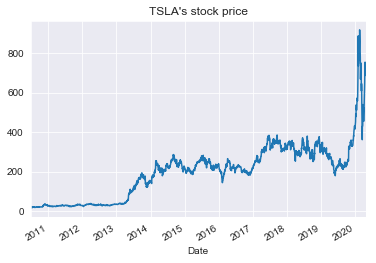

In [23]:
ticker = yf.Ticker('TSLA')

tsla_df = ticker.history(period="max")

tsla_df['Close'].plot(title="TSLA's stock price")

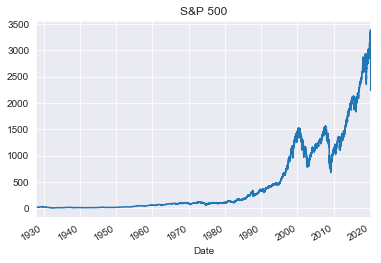

In [25]:
ticker = yf.Ticker('^GSPC')

sap_df = ticker.history(period="max")

sap_df['Close'].plot(title="S&P 500")

In [29]:
# Yahoo Financials on a Single ticker
yahoo_financials = YahooFinancials('TSLA')

data = yahoo_financials.get_historical_price_data(start_date='2000-01-01', 
                                                  end_date='2019-12-31', 
                                                  time_interval='weekly')

tsla_df = pd.DataFrame(data['TSLA']['prices'])
tsla_df = tsla_df.drop('date', axis=1).set_index('formatted_date')
tsla_df.head()

adjclose      close   high        low       open    volume
formatted_date                                                             
2010-06-28      19.200001  19.200001  30.42  17.540001  19.000000  49312000
2010-07-05      17.400000  17.400000  20.00  14.980000  20.000000  25550600
2010-07-12      20.639999  20.639999  21.50  16.900000  17.950001  15438900
2010-07-19      21.290001  21.290001  22.25  19.500000  21.370001   7175700
2010-07-26      19.940001  19.940001  21.50  19.549999  21.500000   3052000

In [308]:
# Yahoo Financials on an array of tickers
yahoo_financials = YahooFinancials(tickers)

yfdata = yahoo_financials.get_historical_price_data(start_date='2019-01-01', 
                                                  end_date='2020-04-22', 
                                                  time_interval='weekly')



In [310]:
yfdata

{'AAPL': {'eventsData': {'dividends': {'2019-08-06': {'amount': 0.77,
     'date': 1565357400,
     'formatted_date': '2019-08-09'},
    '2020-02-04': {'amount': 0.77,
     'date': 1581085800,
     'formatted_date': '2020-02-07'},
    '2019-02-05': {'amount': 0.73,
     'date': 1549636200,
     'formatted_date': '2019-02-08'},
    '2019-05-07': {'amount': 0.77,
     'date': 1557495000,
     'formatted_date': '2019-05-10'},
    '2019-11-05': {'amount': 0.77,
     'date': 1573137000,
     'formatted_date': '2019-11-07'}}},
  'firstTradeDate': {'formatted_date': '1980-12-12', 'date': 345479400},
  'currency': 'USD',
  'instrumentType': 'EQUITY',
  'timeZone': {'gmtOffset': -14400},
  'prices': [{'date': 1546318800,
    'high': 158.85000610351562,
    'low': 142.0,
    'open': 154.88999938964844,
    'close': 147.92999267578125,
    'volume': 241736800,
    'adjclose': 145.39520263671875,
    'formatted_date': '2019-01-01'},
   {'date': 1546923600,
    'high': 154.52999877929688,
    'low'

In [311]:
prices_df = pd.DataFrame({
    a: {x['formatted_date']: x['adjclose'] for x in data[a]['prices']} for a in tickers
})

TypeError: 'module' object is not subscriptable

In [ ]:
prices_df.head()

In [ ]:
# Single Plotting

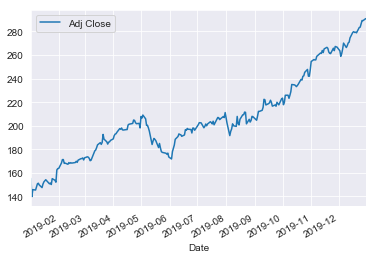

In [33]:
 AAPL['Adj Close'].plot(legend=True)

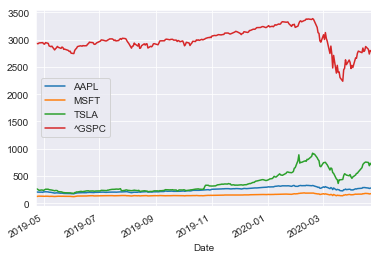

In [41]:
# groupp plotting
withsnp['Adj Close'].plot(legend=True)

In [49]:
# getting gold and commodity prices from Quandl
# https://blog.quandl.com/api-for-commodity-data
import creds
quadlAPIKey = creds.quandlKey

In [78]:
audf = DataReader('PERTH/GOLD_USD_D','quandl', start=start, end=end, access_key=quadlAPIKey)

In [80]:
audf.head()

BidHigh  AskHigh   BidLow   AskLow  BidAverage  AskAverage  \
Date                                                                     
2020-03-31  1613.60  1623.94  1604.56  1615.07     1610.76     1621.01   
2020-03-30  1618.91  1637.29  1605.17  1621.53     1612.67     1628.41   
2020-03-27  1624.78  1636.52  1608.28  1624.95     1617.51     1632.65   
2020-03-26  1607.59  1616.69  1593.17  1605.93     1599.41     1611.40   
2020-03-25  1623.00  1651.56  1593.82  1610.43     1607.37     1626.94   

            6MonthGoldLeaseRatesPA  
Date                                
2020-03-31                     NaN  
2020-03-30                     NaN  
2020-03-27                     NaN  
2020-03-26                     NaN  
2020-03-25                     NaN

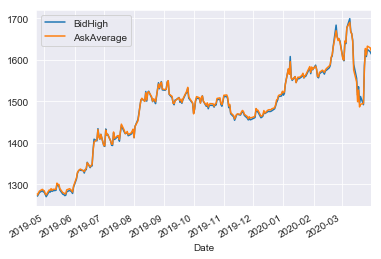

In [83]:
audf[['BidHigh','AskAverage']].plot(legend=True)

In [88]:
gasdf = DataReader('FRED/GASREGCOVW','quandl', start=start, end=end, access_key=quadlAPIKey)

In [90]:
gasdf.head()

Value
Date             
2020-04-20  1.694
2020-04-13  1.735
2020-04-06  1.800
2020-03-30  1.886
2020-03-23  2.007

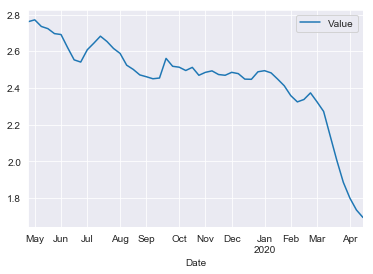

In [91]:
gasdf.plot(legend=True)

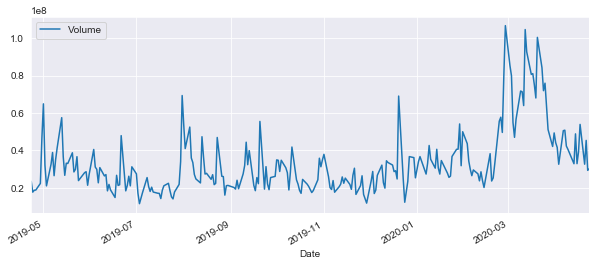

In [94]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

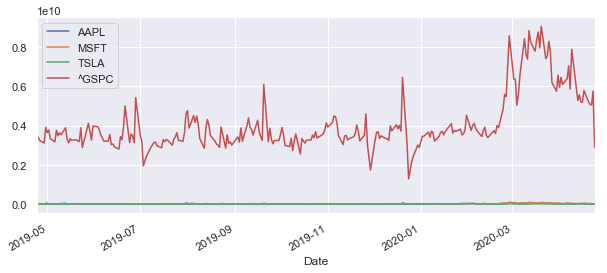

In [140]:
withsnp['Volume'].plot(legend=True, figsize=(10,4))


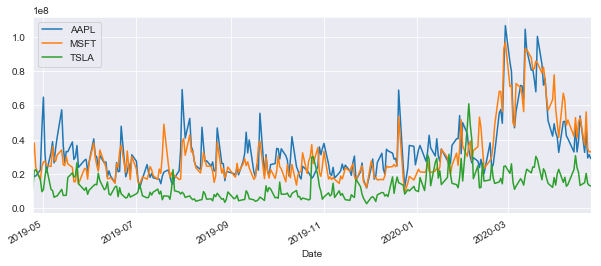

In [101]:
nosnp['Volume'].plot(legend=True, figsize=(10,4))

### Moving Averages

In [102]:
# creating a rolling mean
ma_day = [10,20,50]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

In [104]:
AAPL.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-04-24  207.360001  208.479996  207.050003  207.160004  204.483505   
2019-04-25  206.830002  207.759995  205.119995  205.279999  202.627808   
2019-04-26  204.899994  205.000000  202.119995  204.300003  201.660461   
2019-04-29  204.399994  205.970001  203.860001  204.610001  201.966461   
2019-04-30  203.059998  203.399994  199.110001  200.669998  198.077362   

              Volume  MA for 10 days  MA for 20 days  MA for 50 days  
Date                                                                  
2019-04-24  17540600             NaN             NaN             NaN  
2019-04-25  18543200             NaN             NaN             NaN  
2019-04-26  18649100             NaN             NaN             NaN  
2019-04-29  22204700             NaN             NaN             NaN  
2019-04-30  46534900             NaN             NaN             NaN

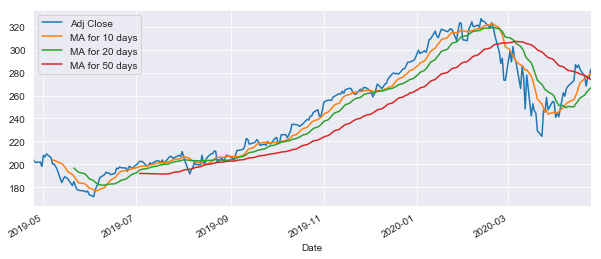

In [107]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(legend=True,subplots=False,figsize=(10,4))

### Daily Return Analysis

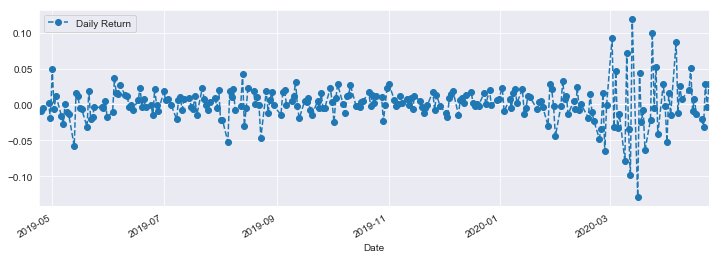

In [109]:
# use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

#### Viewing the average daily return with a histogram

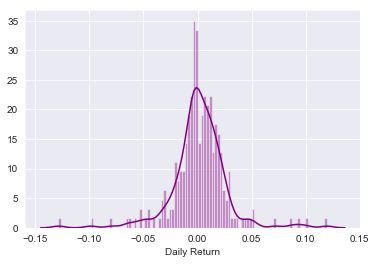

In [110]:
# Seaborn style
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

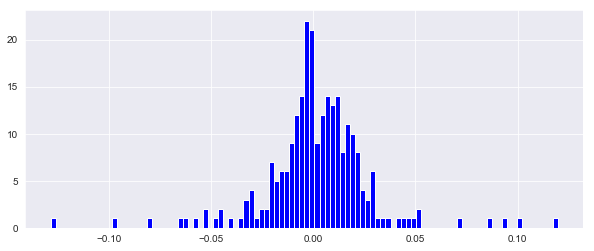

In [116]:
# pandas plotting
AAPL['Daily Return'].hist(bins=100, color='blue',figsize=(10,4))

In [119]:
nosnp['Adj Close'].head()

AAPL        MSFT        TSLA
Date                                          
2019-04-24  204.483505  123.377647  258.660004
2019-04-25  202.627808  127.463577  247.630005
2019-04-26  201.660461  128.193909  235.139999
2019-04-29  201.966461  128.075485  241.470001
2019-04-30  198.077362  128.894653  238.690002

In [120]:
# grab the .pct_change() for everything
nosnpreturns = nosnp['Adj Close'].pct_change()

In [132]:
nosnpreturns.head()

AAPL      MSFT      TSLA
Date                                    
2019-04-24       NaN       NaN       NaN
2019-04-25 -0.009075  0.033117 -0.042643
2019-04-26 -0.004774  0.005730 -0.050438
2019-04-29  0.001517 -0.000924  0.026920
2019-04-30 -0.019256  0.006396 -0.011513

#### using JointPlot to compare the Daily Change Of Prices of two stocks to each other

A stock compared with itself has a 1-1 relationship. Adding the pearsonr annotation

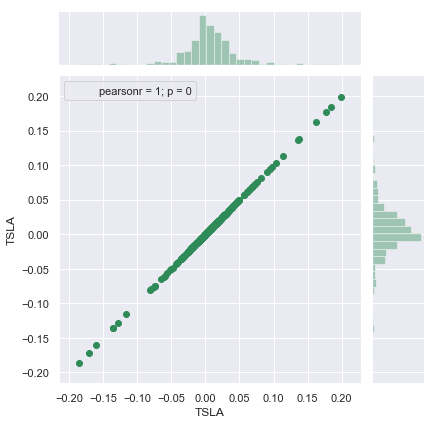

In [135]:
sns.jointplot('TSLA','TSLA',nosnpreturns,kind='scatter',color='seagreen').annotate(stats.pearsonr)

But two stocks should compare

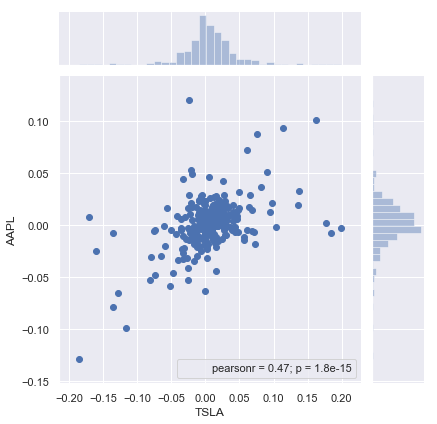

In [136]:
sns.jointplot('TSLA','AAPL',nosnpreturns,kind='scatter').annotate(stats.pearsonr)

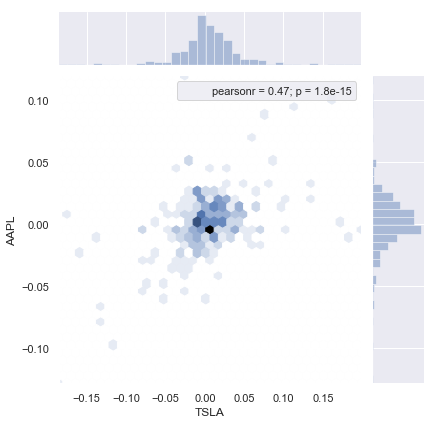

In [137]:
# break out differences with 'hex'
sns.jointplot('TSLA','AAPL',nosnpreturns,kind='hex').annotate(stats.pearsonr)

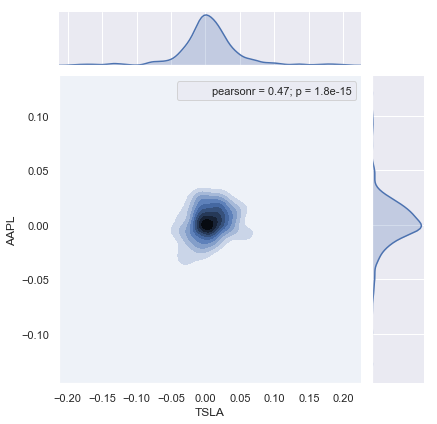

In [138]:
# smooth out data with a kernel density estimation
sns.jointplot('TSLA','AAPL',nosnpreturns,kind='kde').annotate(stats.pearsonr)

### Comparing with SandP500


In [141]:
withsnpreturns = withsnp['Adj Close'].pct_change()

In [142]:
withsnpreturns.head()

AAPL      MSFT      TSLA     ^GSPC
Date                                              
2019-04-24       NaN       NaN       NaN       NaN
2019-04-25 -0.009075  0.033117 -0.042643 -0.000369
2019-04-26 -0.004774  0.005730 -0.050438  0.004685
2019-04-29  0.001517 -0.000924  0.026920  0.001072
2019-04-30 -0.019256  0.006396 -0.011513  0.000951

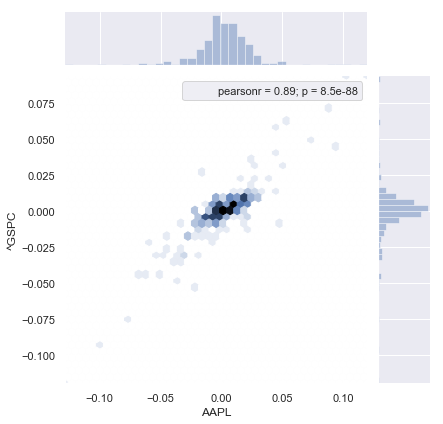

In [143]:
sns.jointplot('AAPL','^GSPC',withsnpreturns,kind='hex').annotate(stats.pearsonr)

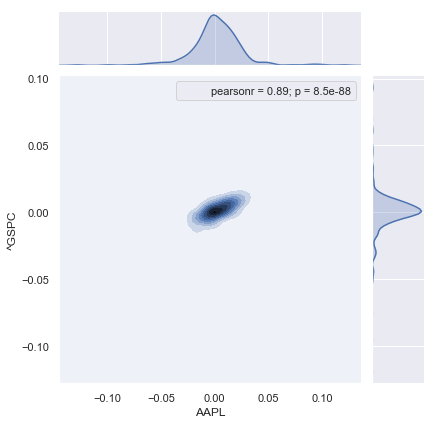

In [144]:
# now the kernel density estimation
sns.jointplot('AAPL','^GSPC',withsnpreturns,kind='kde').annotate(stats.pearsonr)

### Evaluating all the stock returns with a PairPlot

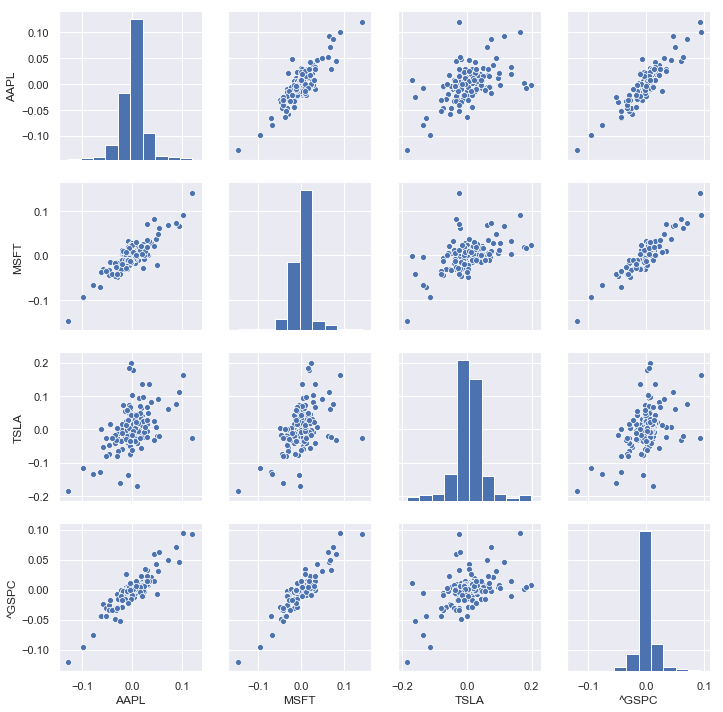

In [148]:
sns.pairplot(withsnpreturns.dropna())


### Making the comparison of Daily Change Of Prices with a PairGrid plot
- Upper Triangle is the upper right of all the plots as a diagonally divided box

There are three sections:"Upper Triangle", "Lower Triange", "Diagonal"

Here you'll see a kdeplot in the lower, a scatterplot in the upper divided by a histogram


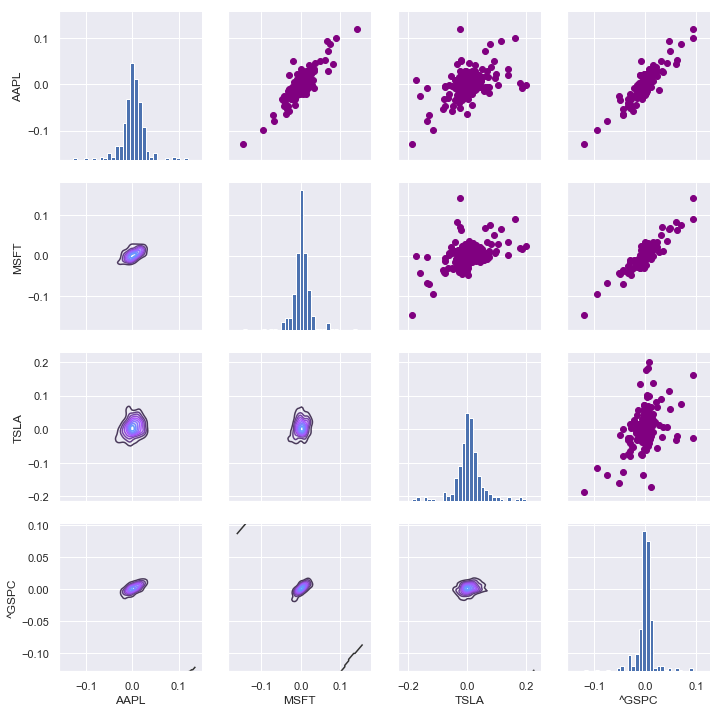

In [149]:

# First create a new DataFrame from tech_rets.dropna() (Daily Returns)
returns_fig = sns.PairGrid(withsnpreturns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)


### Analyzing Daily Closing Prices

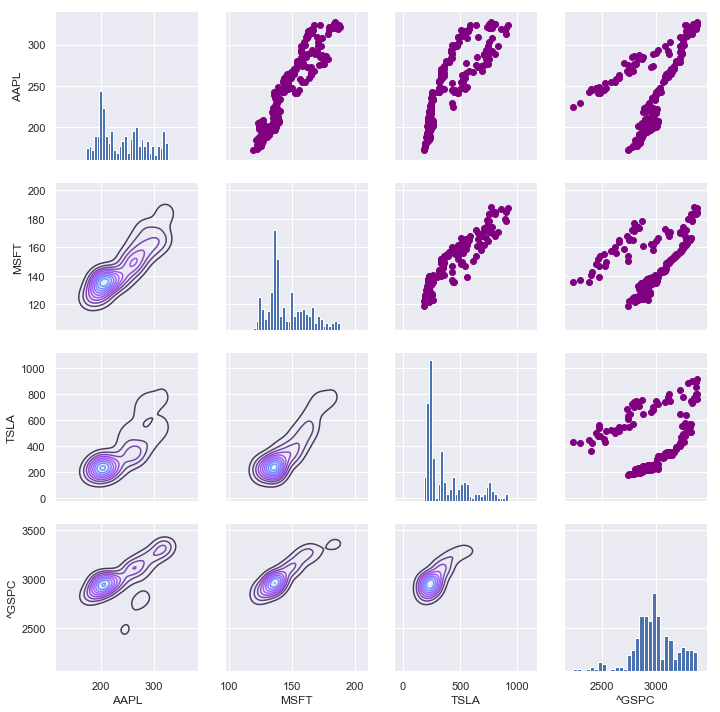

In [152]:
withsnpclose = withsnp['Adj Close']
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(withsnpclose)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

### Heatmaps

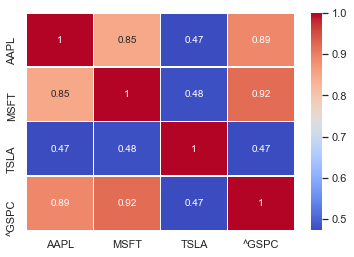

In [166]:
# showing the comparative returns with numbers
t = withsnpreturns.dropna().corr()
sns.heatmap(t,annot=True, cmap="coolwarm",linewidths=.5)

#### Showing closing data alone


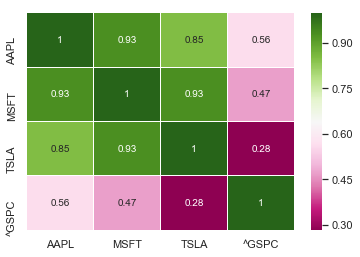

In [167]:
c = withsnpclose.dropna().corr()
sns.heatmap(c,annot=True, cmap="PiYG",linewidths=.02)


### blow this out will all data, not just returns

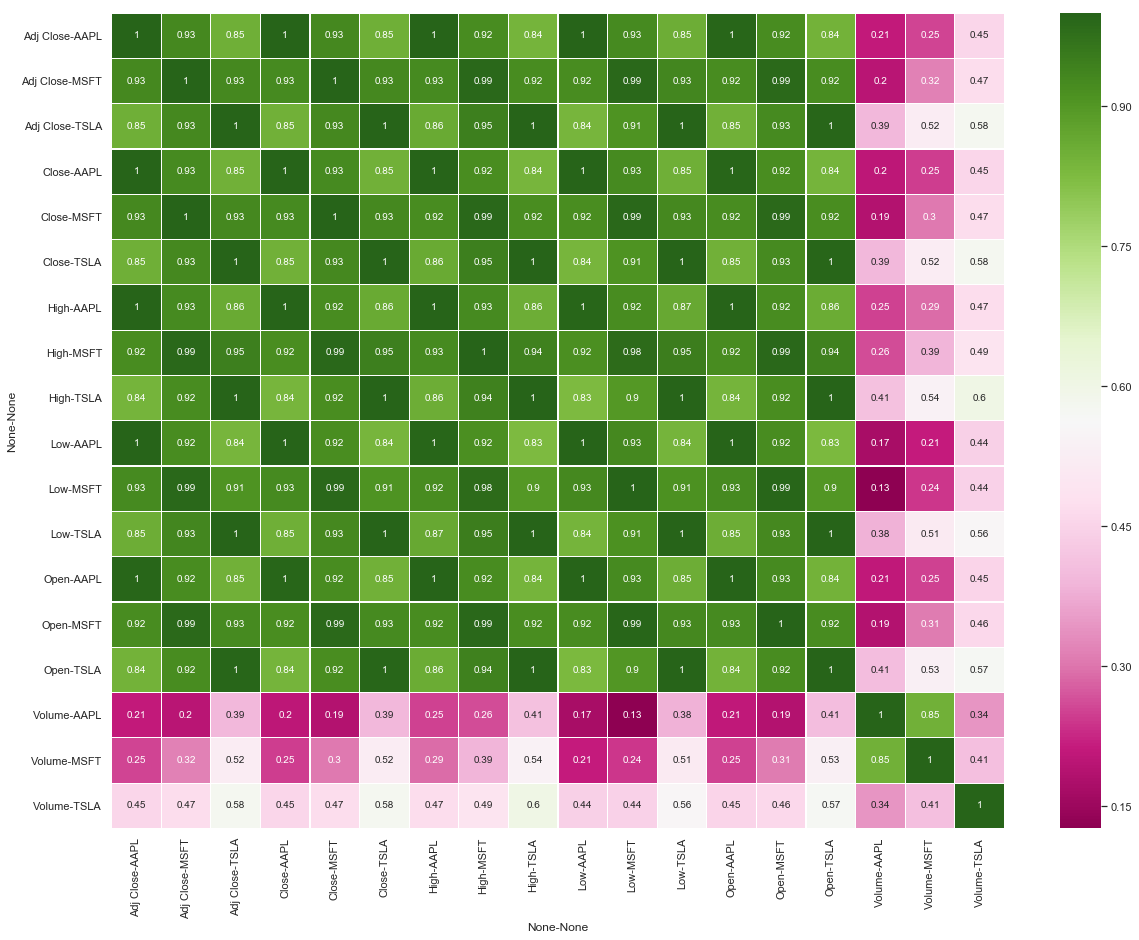

In [163]:
# 
plt.figure(figsize=(20,15))
t = nosnp.dropna().corr()
sns.heatmap(t,annot=True, cmap="PiYG",linewidths=.2)

### Showing risk

**prefer stocks that are in the lower right quadrant (low risk, higher expected return)**

- upper left (high risk, low return)
- upper right (high risk, high return)
- lower left (low risk, low return)
- lower right (low risk, high return)

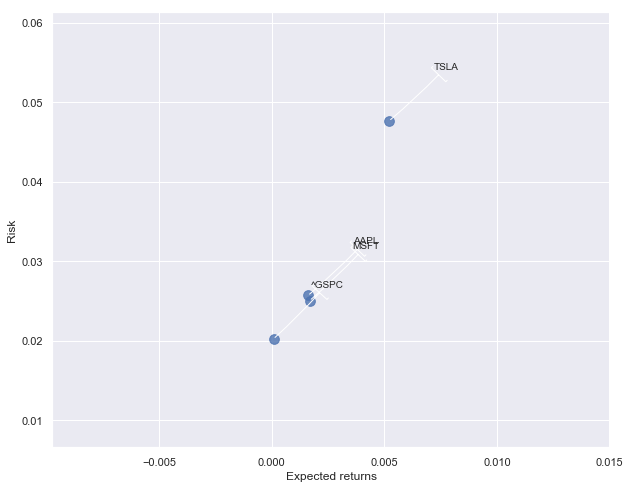

In [189]:
rets = withsnpreturns.dropna()

area = np.pi*30
plt.figure(figsize=(10,8))
plt.scatter(rets.mean(), rets.std(),alpha = 0.8,s=area)

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (70, 50),
        textcoords = 'offset points', ha='right', va='bottom',
        arrowprops = dict(arrowstyle = ']-', connectionstyle = 'arc3,rad=-.03'))


 ### Value At Risk

#### Value at risk using the "bootstrap" method

This calculates the empirical quantiles from a histogram of daily returns

Today's evaluation of Tesla returns -0.06302450944324325

The 0.05 empirical quantile of daily returns is at -0.063.
With 95% confidence, our worst daily loss will not exceed 6.3%.

If we have a 1 million dollar investment, our one-day 5% VaR is 0.063 * 1,000,000 = $63,000.

In [191]:
rets['TSLA'].quantile(0.05)

-0.06302450944324325

Compare that with Apple:
the 0.05 empirical quantile of daily returns is at -0.034.

95% confidence, worst daily loss will not exceed 3.4%.

1 million dollar investment, one-day 5% VaR is 0.034 * 1,000,000 = $34,000.

In [192]:
rets['AAPL'].quantile(0.05)

-0.034215511527353734

Compared with the S&P500

the 0.05 empirical quantile of daily returns is at -0.029.

95% confidence, worst daily loss will not exceed 2.9%.

1 million dollar investment, one-day 5% VaR is 0.029 * 1,000,000 = $29,000.

In [194]:
rets['^GSPC'].quantile(0.05)

-0.029978690227813985

#### Value at Risk using the Monte Carlo method

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.


This uses the geometric Brownian motion (GBM), which is technically known as a Markov Process. This means that the stock price follows a Random Walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation:
$$\frac{\Delta S}{S} = \mu\Delta t + \sigma \epsilon \sqrt{\Delta t}$$

Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.
$$ \Delta S = S(\mu\Delta t + \sigma \epsilon \sqrt{\Delta t}) $$

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each time period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks, check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp


In [293]:
# time horizon
days = 365

# delta
dt = 1/days

# grab mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['AAPL']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['AAPL']

In [205]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Shock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [199]:
AAPL.head(1)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-04-24  207.360001  208.479996  207.050003  207.160004  204.483505   

              Volume  
Date                  
2019-04-24  17540600

In [217]:
mc = stock_monte_carlo(start_price,days,mu,sigma)

In [218]:
mc

array([207.360001  , 206.3131849 , 206.14181023, 207.45693528,
       207.08494577, 208.66895538, 206.56571226, 210.87451168,
       208.66248026, 207.42296134])

Text(0.5, 1.0, 'Monte Carlo Analysis for Apple')

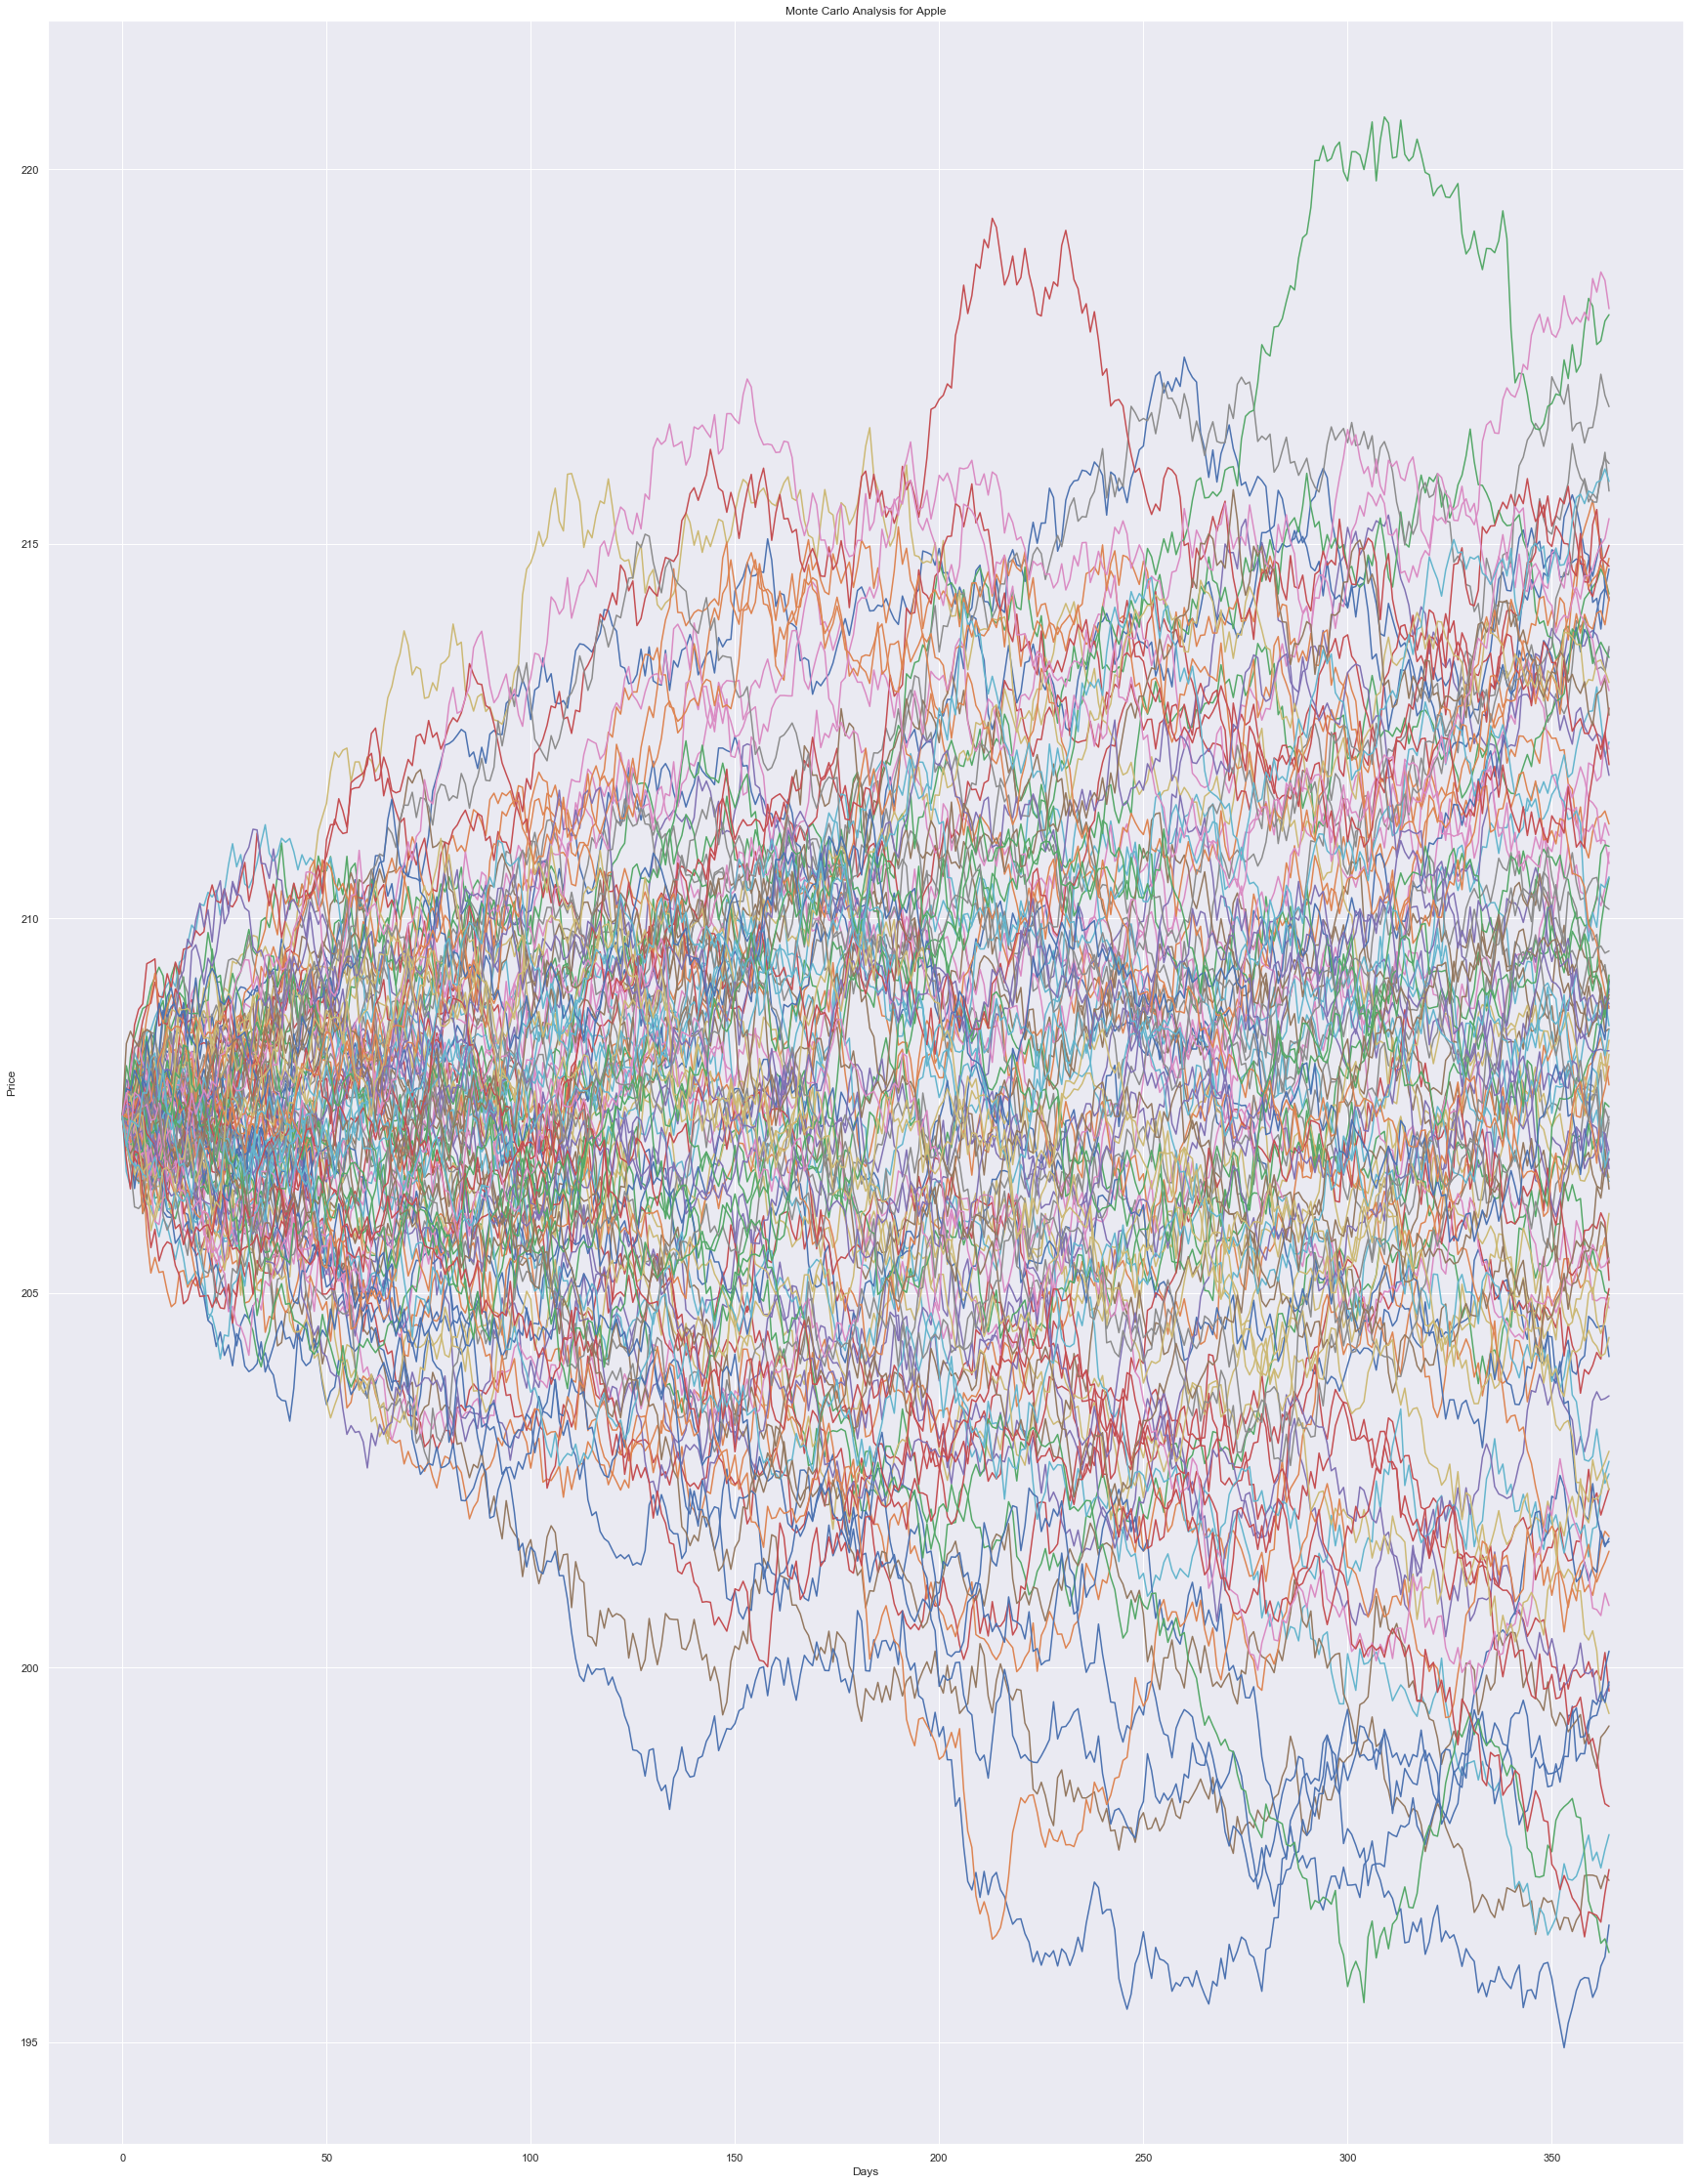

In [225]:
# Get start price from AAPL.head()
start_price = 207.360001

mcdict = {}
plt.figure(figsize=(30,40))
for run in range(100):
    mcdict[run] = stock_monte_carlo(start_price,days,mu,sigma)
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Apple')

### Can we determine what values at the end of the Monte Carlo array were most likely?

In [236]:

for k,v in mcdict.items():
    if k == 99:
        lastday=np.array(v)

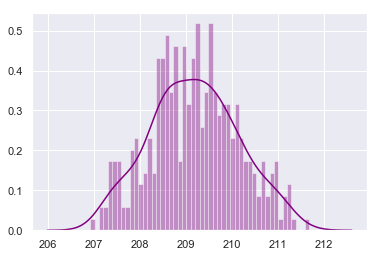

In [242]:
sns.distplot(lastday,bins=50,color='purple')

In [307]:
# most frequent
#np.bincount(lastday,dtype=float)).argmax() - doesn't work on floats
from collections import Counter
# Counter(lastday)

In [258]:
#[float(x, '.2f') for x in lastday]

float(format(lastday[0]))

207.360001

In [259]:
round(lastday[0],2)

207.36

In [263]:
lastdayarr = []
for x in range(len(lastday)):
    lastdayarr.append(round(lastday[x],2))

In [271]:
valuecounts = Counter(lastdayarr)

In [291]:
# Does it make a difference if we only count items that have higher frequency?
summarycountssmall = []
summarycountsbig = []
for k, v in valuecounts.items():
    if v >3:
        #summarycountsbig.append(k)
    #elif v > 3:
        summarycountssmall.append(k)
 

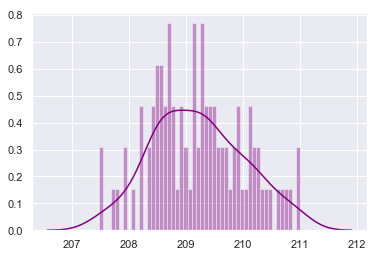

In [281]:
sns.distplot(summarycounts,bins=50,color='purple')

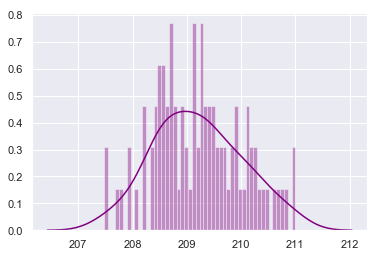

In [282]:
sns.distplot(summarycountsbig,bins=50,color='purple')

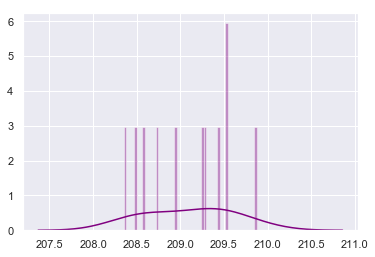

In [292]:
sns.distplot(summarycountssmall,bins=50,color='purple')

### Now do a large run

In [296]:
# This step generates the data:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];


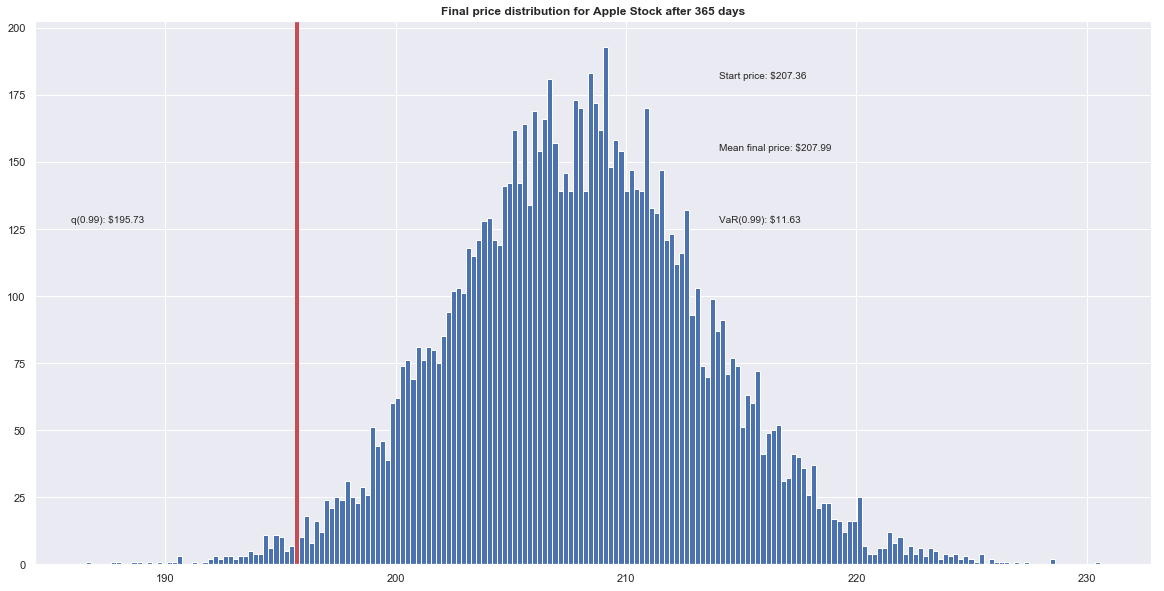

In [306]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)

plt.figure(figsize=(20,10))

# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')


# Title
plt.title(u"Final price distribution for Apple Stock after %s days" % days, weight='bold');